In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys, gzip, csv
from glob import glob

import numpy as np
import collections

import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import pandas as pd

In [2]:
def get_mean(word):
    idx = vocab.index(word)
    return(np.mean(rows[idx]))

def get_values(word):
    idx = vocab.index(word)
    return(rows[idx])

def plt_change_over_time(words):
    fig = plt.figure(figsize=(20, 15))
    means = np.mean(rows,axis=0)
    plt.plot(means,linestyle=':', color="green")
    
    if type(words) == list:
        for word in words:
            idx = vocab.index(word)
            vals = rows[idx]
            plt.plot(vals)
        plt.xticks(np.arange(len(model_names)),model_names)    
        plt.ylim(0,1)
        plt.legend(["mean"] + words)
        plt.show()
    else:
        return False

def distance(x,y):
    return max(x, y) - min(x, y)

    
def plt_change_over_time_distance_from_mean(words):
    fig = plt.figure(figsize=(20, 15))
    means = np.mean(rows,axis=0)
    
    if type(words) == list:
        for word in words:
            idx = vocab.index(word)
            vals = list()
            for i,v in enumerate(rows[idx]):
                vals.append(distance(means[i],v))
            plt.plot(vals)
        plt.xticks(np.arange(len(model_names)),model_names)    
        plt.legend(words)
        plt.show()
    else:
        return False        

In [3]:
models = [
    ["Henry VII","../models/eebo-henry_VII-drift.csv.gz"],
    ["Edward VI","../models/eebo-edward_VI-drift.csv.gz"],
    ["Mary I","../models/eebo-mary_I-drift.csv.gz"],
    ["Elizabeth I","../models/eebo-elizabeth_I-drift.csv.gz"],
    ["James I","../models/eebo-james_I-drift.csv.gz"],
    ["Charles I","../models/eebo-charles_I-drift.csv.gz"],
    ["Oliver Cromwell","../models/eebo-oliver_cromwell-drift.csv.gz"],
    ["Charles II","../models/eebo-charles_II-drift.csv.gz"], 
]
    
drift_data = list()
for model_name, file in models:
    print("starting {0}".format(model_name))
    input_data = dict()
    row_count = 0
    with gzip.open(file, 'rt') as csvfile:    
        reader = csv.reader(csvfile)
        for row in reader:
            val = float(row[1].replace('[[','').replace(']]',''))
        
            # convert to angular distance for values from 0 - 1
            val = np.arccos(val) / np.pi
            input_data[row[0]] = val
            row_count += 1

    drift_data.append([model_name,input_data])

starting Henry VII
starting Edward VI
starting Mary I
starting Elizabeth I
starting James I
starting Charles I
starting Oliver Cromwell
starting Charles II


In [4]:
# extract list of unique terms
unique_terms = set().union(*(m[1].keys() for m in drift_data))

# get the distribution of vocab over models
vocab = list()
model_names = [x[0] for x in drift_data]
mc = len(model_names)
rows = list()

for word in unique_terms:
    row = list()
    for model, data in drift_data:
        if word in data.keys():
            row.append(data[word])
        #else:
        #    row.append(1)
        
    # only add if we have all the words
    if len(row) == mc:
        vocab.append(word)
        rows.append(row)

# convert to numpy array
rows = np.array(rows)

In [5]:
from scipy.stats import entropy

# define a comparison set of words
for t in ["church","faith","the","state"]:
    print("TERM: {0}".format(t))
    idx = vocab.index(t)
    #print(rows[idx])
    print("Mean:",np.mean(rows[idx]))
    print("Stdev:",statistics.stdev(rows[idx]))
    print("Entropy:",entropy(rows[idx]))
    print("\n")


TERM: church
Mean: 0.4584342187761417
Stdev: 0.030730224241644028
Entropy: 2.077462758533911


TERM: faith
Mean: 0.46494561089110226
Stdev: 0.02290835707748282
Entropy: 2.0783791834805863


TERM: the
Mean: 0.454759906213508
Stdev: 0.036112766244164096
Entropy: 2.076639505333909


TERM: state
Mean: 0.436273844894867
Stdev: 0.02820597282400104
Entropy: 2.0776253266432056




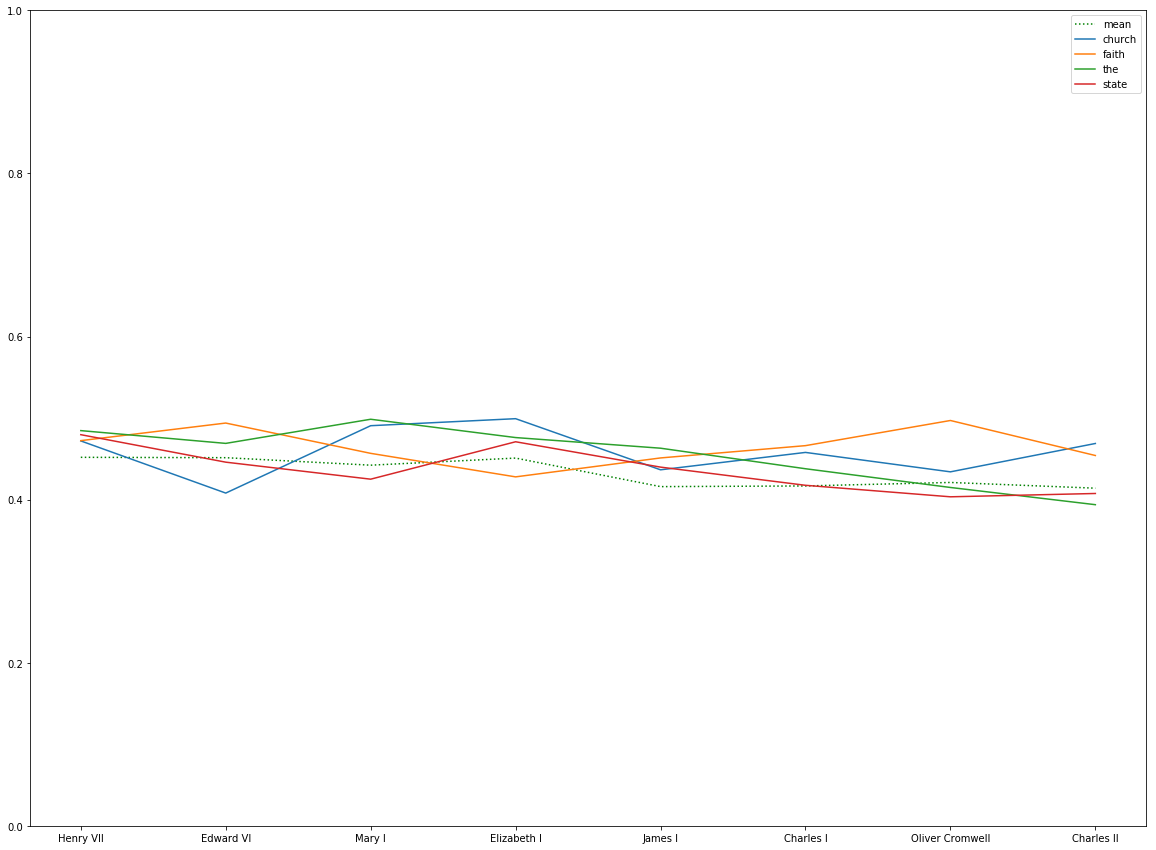

In [6]:
plt_change_over_time(["church","faith","the","state"])

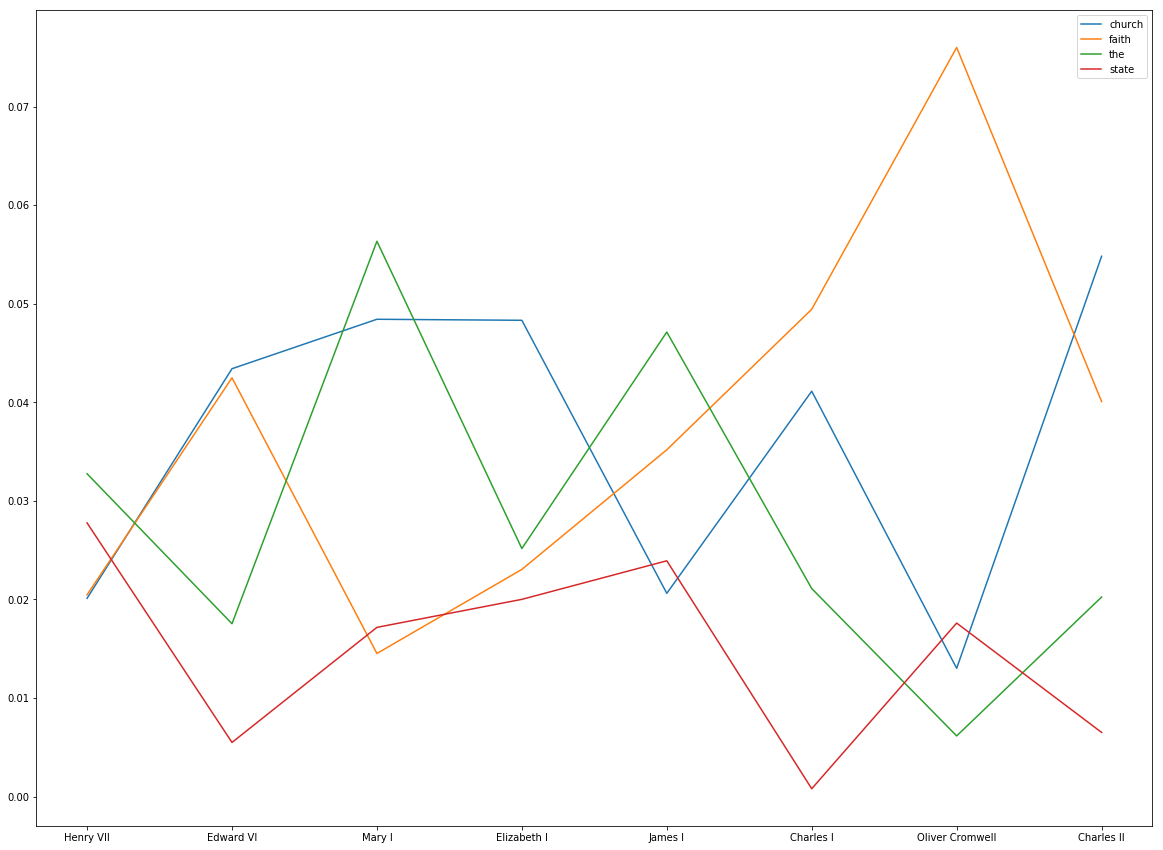

In [7]:
plt_change_over_time_distance_from_mean(["church","faith","the","state"])

In [ ]:
# display words with greatest change over time
#for idx in np.argsort([statistics.stdev(x) for x in rows])[:-25 - 1:-1]:
#    print(vocab[idx],statistics.stdev(rows[idx]))

In [ ]:
#statistics.stdev(get_values("church"))

In [ ]:
# display words with least change over time
#for idx in np.argsort(([np.mean(x) for x in rows]))[:50]:
    # which are present in at least three periods?  
#    print(vocab[idx],np.mean(rows[idx]))

In [8]:
# display raw counts for period of max change 
# and percents

change_chart = pd.DataFrame(rows, index=vocab, columns=model_names)
values=dict()

for x in range(len(model_names)):
    values[x] = 0
for x in np.argmax(change_chart.values, axis=1):
    values[x] += 1

print("Term Change By Period:")
for v in values.keys():
    print("{:<20} {:>1}% ({:2})".format(model_names[v],
                                       np.round((values[v]/change_chart.shape[0]*100),2),
                                       values[v]))

Term Change By Period:
Henry VII            19.87% (2771)
Edward VI            22.27% (3107)
Mary I               13.81% (1926)
Elizabeth I          19.0% (2651)
James I              2.4% (335)
Charles I            4.67% (651)
Oliver Cromwell      7.63% (1065)
Charles II           10.34% (1443)


In [9]:
change_chart['Most Significant Change'] = np.argmax(change_chart.values, axis=1)
change_chart

,Henry VII,Edward VI,Mary I,Elizabeth I,James I,Charles I,Oliver Cromwell,Charles II,Most Significant Change
cui,0.429977,0.420594,0.477455,0.458391,0.336508,0.339259,0.335620,0.289043,2
iron,0.458270,0.439790,0.458753,0.437375,0.490450,0.421686,0.410023,0.501158,7
å¿uf,0.492831,0.447754,0.433249,0.461234,0.390444,0.428202,0.472055,0.486238,0
backe,0.522207,0.491488,0.426470,0.473336,0.433333,0.444195,0.468795,0.396649,0
triu,0.444660,0.426088,0.453863,0.420051,0.404268,0.400778,0.388588,0.403787,2
dust,0.466599,0.470718,0.456656,0.460138,0.436674,0.439210,0.435756,0.457239,1
taking,0.439503,0.427508,0.412418,0.459593,0.435445,0.474592,0.452304,0.408406,5
locked,0.460202,0.494681,0.414284,0.457815,0.440535,0.404700,0.450764,0.416405,1
sprite,0.484546,0.495398,0.425577,0.408547,0.383796,0.404671,0.332325,0.463062,1
clus,0.369749,0.393714,0.466223,0.457052,0.439044,0.428329,0.304407,0.436059,2


In [10]:
# now special terms of interest
words_of_interest = ["religion","elect","election",
                     "church","churche","trinity","jesus","individual",
                     "predestination","predestinate","chosen","soul","redemption","faith",
                     "fate","self","self","sacrement","authority"]

words = list()
model_names = [x[0] for x in drift_data]
rows = list()

for word in words_of_interest:
    words.append(word)
    row = list()
    for model, data in drift_data:
        if word in data.keys():
            row.append(data[word])
        else:
            row.append(0)
        
    rows.append(row)
    
# display raw counts for period of max change 
# and percents for terms of interest

change_chart = pd.DataFrame(rows, index=words, columns=model_names)
values=dict()

for x in range(len(model_names)):
    values[x] = 0
for x in np.argmax(change_chart.values, axis=1):
    values[x] += 1

print("Term Change By Period:")
for v in values.keys():
    print("{:<20} {:>1}% ({:2})".format(model_names[v],
                                       np.round((values[v]/change_chart.shape[0]*100),2),
                                       values[v]))
    

Term Change By Period:
Henry VII            26.32% ( 5)
Edward VI            21.05% ( 4)
Mary I               10.53% ( 2)
Elizabeth I          21.05% ( 4)
James I              5.26% ( 1)
Charles I            5.26% ( 1)
Oliver Cromwell      10.53% ( 2)
Charles II           0.0% ( 0)


In [11]:
import pandas as pd
change_chart['Most Significant Change'] = np.argmax(change_chart.values, axis=1)
change_chart

,Henry VII,Edward VI,Mary I,Elizabeth I,James I,Charles I,Oliver Cromwell,Charles II,Most Significant Change
religion,0.485928,0.427620,0.480635,0.492312,0.423761,0.460933,0.432179,0.436407,3
elect,0.513440,0.412454,0.423738,0.440738,0.393366,0.452442,0.444851,0.437671,0
election,0.463887,0.418095,0.406874,0.458536,0.399385,0.482087,0.386017,0.432343,5
church,0.472015,0.408049,0.490675,0.499283,0.436581,0.457916,0.434090,0.468864,3
churche,0.470898,0.369270,0.530207,0.485644,0.449729,0.436721,0.458720,0.436746,2
trinity,0.000000,0.000000,0.000000,0.000000,0.413923,0.433499,0.482922,0.431517,6
jesus,0.480210,0.000000,0.466919,0.442167,0.447323,0.404109,0.452802,0.414670,0
individual,0.000000,0.000000,0.000000,0.000000,0.558335,0.529295,0.392629,0.401012,4
predestination,0.503360,0.000000,0.000000,0.433598,0.410778,0.453339,0.440364,0.447701,0
predestinate,0.466441,0.000000,0.451715,0.471085,0.443935,0.355828,0.446045,0.404700,3
